<h1><center>NoShow Project</h1>
<h4>TCSS 555<br>
Spring 2018<br>
Thuan Lam, Tood Robbins, xxx</h4></center>


<h2>Libraries</h2>

In [1]:
# Load libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from datetime import datetime
from dateutil.parser import parse
from pandas.plotting import scatter_matrix
from sklearn.utils import shuffle
from sklearn.preprocessing import MinMaxScaler
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

## User Difined Functions

In [2]:
# user-defined functions

def get_gender_classification(gender):
    if gender == 'F':
        return 0
    elif gender == 'M':
        return 1
    else:
        return -1
    
def get_noshow_classification(noshow):
    if noshow == 'No':
        return 0
    elif noshow == 'Yes':
        return 1
    else:
        return -1
    
def get_neighbourhood_classification(neighbour):
    i, = np.where(neighbourhood == neighbour)
    return i[0]

def get_days(sch , app):
    a = app[0:10]
    b = parse(a)    
    c = sch[0:10]
    d = parse(c)
    return (b - d)

def get_age_classification(age):
    if (age<=1):
        return age
    elif (age<65):
        return 2
    else:
        return 3

def add_data(row):
    row.gender = get_gender_classification(row.gender)
    row.noshow = get_noshow_classification(row.noshow)
    row.neighbourhood = get_neighbourhood_classification(row.neighbourhood)
    row.agegroup = get_age_classification(row.age)
    day1 = parse(row.scheduledday[0:10])
    day2 = parse(row.appointmentday[0:10])
    row.daysbefore = (day2 - day1).days
    row.appointmentdayofweek = datetime.weekday(day2)
    return row

## Load Data

In [3]:
import os 
cwd = os.getcwd()
print('Current folder is {}'.format(cwd))

Current folder is C:\Thuan\ML\Projects\NoShow


In [4]:
# Load dataset
data = pd.read_csv("Data\KaggleV2-May-2016.csv")
data = shuffle(data)
# data = data[:5000]  #get first 5000 rows

# Dimensions of dataset
n = data.shape[0] #rows
p = data.shape[1] #columns

# Lower case all column header
data.columns = [x.lower() for x in data.columns]

# Rename several DataFrame columns
data = data.rename(columns = {
    'sms_received' : 'smsreceived',
    'no-show':'noshow',
})

print('n = {} and p = {}'.format(n, p))

n = 110527 and p = 14


## Preprocess Data
* <h3>Add Columns

In [5]:
# shape
print('Dataset''s shape: {}'.format(data.shape))

# add 2 columns
data.insert(7, 'agegroup', 0)
data.insert(5, 'daysbefore', 0) #how many days from scheduled day to appointment day
data.insert(5, 'appointmentdayofweek', 0)  #what is the day of week of the appointment day

# head
print(data.head(2))

# descriptions
# print(data.describe())

Datasets shape: (110527, 14)
          patientid  appointmentid gender          scheduledday  \
12142  3.319548e+10        5646616      F  2016-05-02T11:33:08Z   
91429  4.123926e+13        5619423      F  2016-04-26T07:59:31Z   

             appointmentday  appointmentdayofweek  daysbefore  age  \
12142  2016-05-02T00:00:00Z                     0           0   33   
91429  2016-06-02T00:00:00Z                     0           0   65   

      neighbourhood  agegroup  scholarship  hipertension  diabetes  \
12142  SANTA TEREZA         0            0             0         0   
91429    TABUAZEIRO         0            0             1         0   

       alcoholism  handcap  smsreceived noshow  
12142           0        1            0     No  
91429           0        0            1     No  


* <h3>Apply user-defined function

In [6]:
neighbourhood = data.neighbourhood.unique()
print(neighbourhood)

['SANTA TEREZA' 'TABUAZEIRO' 'SÃO BENEDITO' 'JESUS DE NAZARETH'
 'FRADINHOS' 'JARDIM CAMBURI' 'ILHA DE SANTA MARIA' 'BELA VISTA'
 'SANTA MARTHA' 'GRANDE VITÓRIA' 'ROMÃO' 'ILHA DAS CAIEIRAS' 'VILA RUBIM'
 'RESISTÊNCIA' 'JOANA D´ARC' 'SANTOS REIS' 'FONTE GRANDE'
 'JARDIM DA PENHA' 'GURIGICA' 'DA PENHA' 'ITARARÉ' 'SÃO PEDRO' 'REPÚBLICA'
 'UNIVERSITÁRIO' 'MÁRIO CYPRESTE' 'SANTO ANDRÉ' 'SANTO ANTÔNIO' 'BONFIM'
 'GOIABEIRAS' 'SÃO JOSÉ' 'BARRO VERMELHO' 'ILHA DO PRÍNCIPE' 'ANDORINHAS'
 'JUCUTUQUARA' 'DO QUADRO' 'DE LOURDES' 'CONQUISTA' 'JABOUR' 'ESTRELINHA'
 'NOVA PALESTINA' 'MARIA ORTIZ' 'BENTO FERREIRA' 'SÃO CRISTÓVÃO'
 'CARATOÍRA' 'SANTA CECÍLIA' 'REDENÇÃO' 'DO CABRAL' 'CENTRO'
 'PONTAL DE CAMBURI' 'FORTE SÃO JOÃO' 'MONTE BELO' 'INHANGUETÁ'
 'SANTA LÚCIA' 'NAZARETH' 'MARUÍPE' 'SANTA LUÍZA' 'ENSEADA DO SUÁ'
 'SANTOS DUMONT' 'COMDUSA' 'CRUZAMENTO' 'BOA VISTA' 'PRAIA DO SUÁ'
 'PRAIA DO CANTO' 'PARQUE MOSCOSO' 'ARIOVALDO FAVALESSA' 'SOLON BORGES'
 'ANTÔNIO HONÓRIO' 'DO MOSCOSO' 'HORTO' 'CONSOL

In [7]:
data = data.apply(lambda row: add_data(row), axis=1)

# keep rows those have 'daysbefore' >= 0
data = data.loc[data['daysbefore'] >= 0]

In [8]:
print(data.head(5))

          patientid  appointmentid  gender          scheduledday  \
12142  3.319548e+10        5646616       0  2016-05-02T11:33:08Z   
91429  4.123926e+13        5619423       0  2016-04-26T07:59:31Z   
63460  2.321247e+13        5678400       0  2016-05-10T08:28:15Z   
86920  9.936876e+13        5702029       0  2016-05-16T11:20:34Z   
85070  5.331798e+11        5781282       1  2016-06-07T09:16:11Z   

             appointmentday  appointmentdayofweek  daysbefore  age  \
12142  2016-05-02T00:00:00Z                     0           0   33   
91429  2016-06-02T00:00:00Z                     3          37   65   
63460  2016-05-10T00:00:00Z                     1           0   23   
86920  2016-06-08T00:00:00Z                     2          23    8   
85070  2016-06-08T00:00:00Z                     2           1   65   

       neighbourhood  agegroup  scholarship  hipertension  diabetes  \
12142              0         2            0             0         0   
91429              1        

In [9]:
# data.groupby(['daysbefore']).size().reset_index(name='daysbefore_counts')

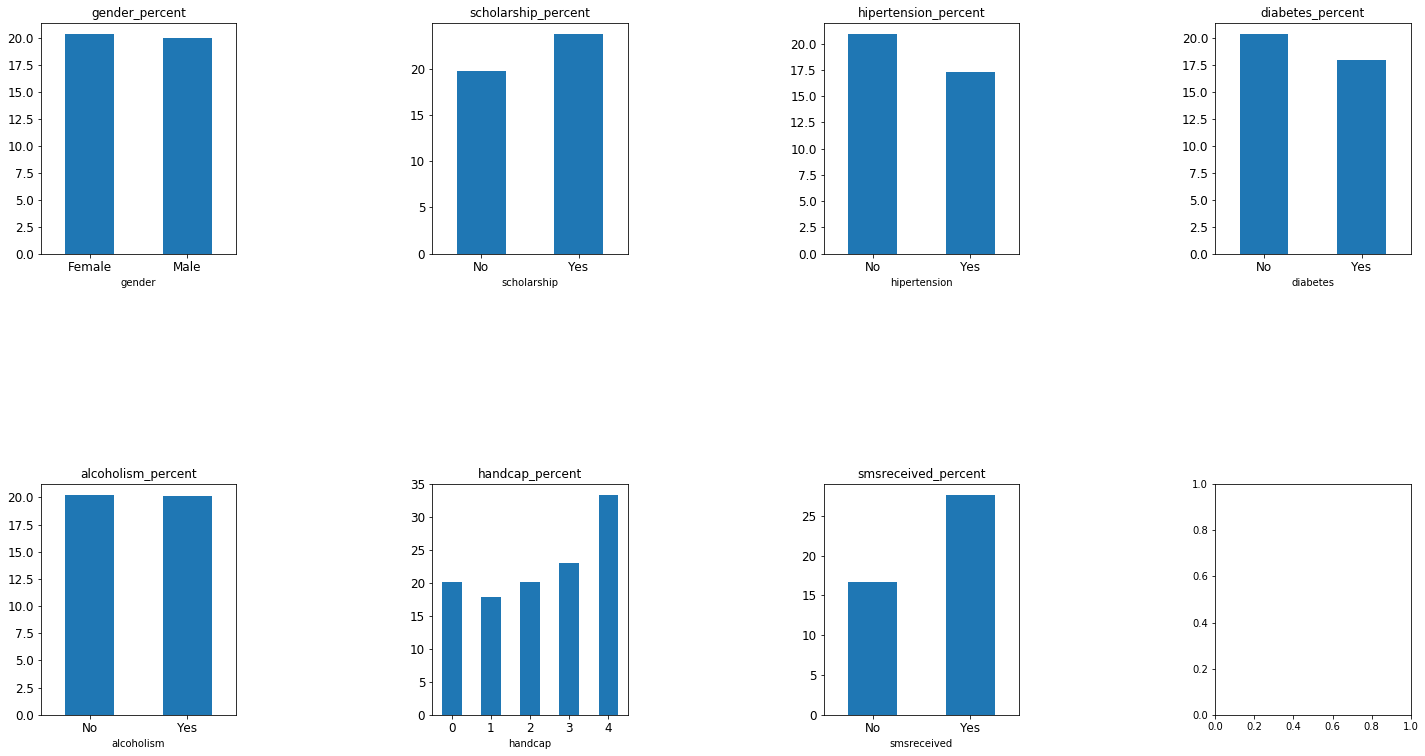

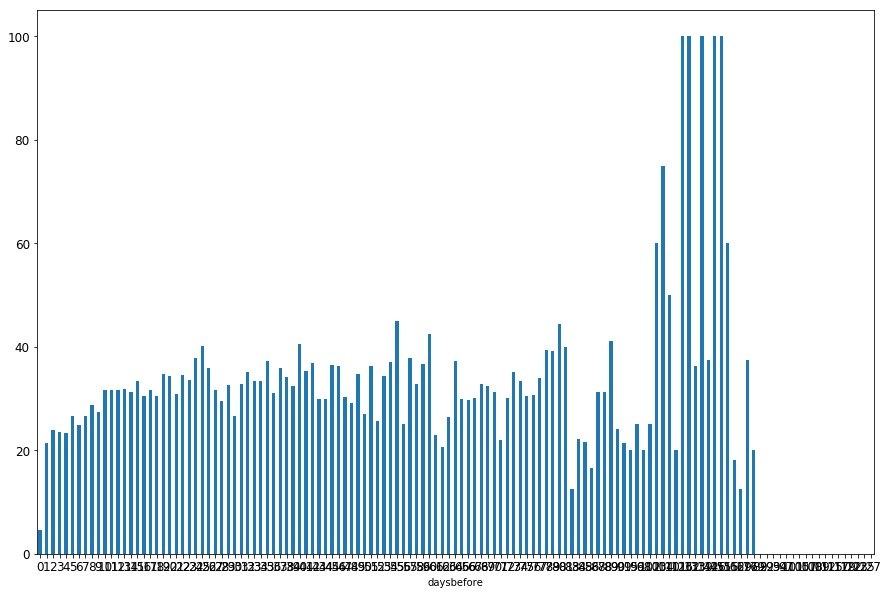

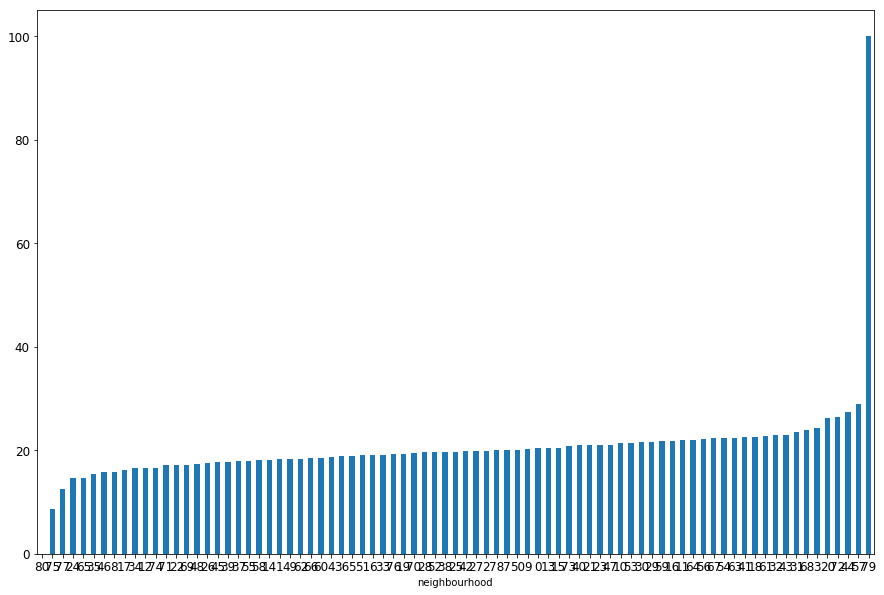

In [10]:
noshow_only = data[data['noshow']==1]
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(15,15))
fig.tight_layout() # Or equivalently,  "plt.tight_layout()"
fig.set_size_inches(20, 10)
plt.subplots_adjust(wspace=1, hspace=1)

# Gender
g = noshow_only.groupby(['gender']).size().reset_index(name='gender_noshow_counts')
g['gender_counts'] = data.groupby(['gender']).size().reset_index(name='gender_counts')['gender_counts']
g['gender_percent'] = g.apply(lambda row: row.gender_noshow_counts / row.gender_counts * 100, axis=1)
g = g.drop(columns=['gender_noshow_counts','gender_counts'])
g.iloc[0, g.columns.get_loc('gender')] = 'Female'
g.iloc[1, g.columns.get_loc('gender')] = 'Male'
g = g.set_index('gender')
g.plot.bar(subplots=True, legend=None, ax=axes[0,0], rot=0, fontsize=12)

# Scholarship
s = noshow_only.groupby(['scholarship']).size().reset_index(name='scholarship_noshow_counts')
s['scholarship_counts'] = data.groupby(['scholarship']).size().reset_index(name='scholarship_counts')['scholarship_counts']
s['scholarship_percent'] = s.apply(lambda row: row.scholarship_noshow_counts / row.scholarship_counts * 100, axis=1)
s = s.drop(columns=['scholarship_noshow_counts','scholarship_counts'])
s.iloc[0, s.columns.get_loc('scholarship')] = 'No'
s.iloc[1, s.columns.get_loc('scholarship')] = 'Yes'
s = s.set_index('scholarship')
s.plot.bar(subplots=True, legend=None, ax=axes[0,1], rot=0, figsize=(15,10), fontsize=12)

# Hipertension  
h = noshow_only.groupby(['hipertension']).size().reset_index(name='hipertension_noshow_counts')
h['hipertension_counts'] = data.groupby(['hipertension']).size().reset_index(name='hipertension_counts')['hipertension_counts']
h['hipertension_percent'] = h.apply(lambda row: row.hipertension_noshow_counts / row.hipertension_counts * 100, axis=1)
h = h.drop(columns=['hipertension_noshow_counts','hipertension_counts'])
h.iloc[0, h.columns.get_loc('hipertension')] = 'No'
h.iloc[1, h.columns.get_loc('hipertension')] = 'Yes'
h = h.set_index('hipertension')
h.plot.bar(subplots=True, legend=None, ax=axes[0,2], rot=0, figsize=(15,10), fontsize=12)

# Diabetes
d = noshow_only.groupby(['diabetes']).size().reset_index(name='diabetes_noshow_counts')
d['diabetes_counts'] = data.groupby(['diabetes']).size().reset_index(name='diabetes_counts')['diabetes_counts']
d['diabetes_percent'] = d.apply(lambda row: row.diabetes_noshow_counts / row.diabetes_counts * 100, axis=1)
d = d.drop(columns=['diabetes_noshow_counts','diabetes_counts'])
d.iloc[0, d.columns.get_loc('diabetes')] = 'No'
d.iloc[1, d.columns.get_loc('diabetes')] = 'Yes'
d = d.set_index('diabetes')
d.plot.bar(subplots=True, legend=None, ax=axes[0,3], rot=0, figsize=(15,10), fontsize=12)

# Alcoholism
a = noshow_only.groupby(['alcoholism']).size().reset_index(name='alcoholism_noshow_counts')
a['alcoholism_counts'] = data.groupby(['alcoholism']).size().reset_index(name='alcoholism_counts')['alcoholism_counts']
a['alcoholism_percent'] = a.apply(lambda row: row.alcoholism_noshow_counts / row.alcoholism_counts * 100, axis=1)
a = a.drop(columns=['alcoholism_noshow_counts','alcoholism_counts'])
a.iloc[0, a.columns.get_loc('alcoholism')] = 'No'
a.iloc[1, a.columns.get_loc('alcoholism')] = 'Yes'
a = a.set_index('alcoholism')
a.plot.bar(subplots=True, legend=None, ax=axes[1,0], rot=0, figsize=(15,10), fontsize=12)

# Handcap
c = noshow_only.groupby(['handcap']).size().reset_index(name='handcap_noshow_counts')
c['handcap_counts'] = data.groupby(['handcap']).size().reset_index(name='handcap_counts')['handcap_counts']
c['handcap_percent'] = c.apply(lambda row: row.handcap_noshow_counts / row.handcap_counts * 100, axis=1)
c = c.drop(columns=['handcap_noshow_counts','handcap_counts'])
c = c.set_index('handcap')
c.plot.bar(subplots=True, legend=None, ax=axes[1,1], rot=0, figsize=(15,10), fontsize=12)

# Sms Received
s = noshow_only.groupby(['smsreceived']).size().reset_index(name='smsreceived_noshow_counts')
s['smsreceived_counts'] = data.groupby(['smsreceived']).size().reset_index(name='smsreceived_counts')['smsreceived_counts']
s['smsreceived_percent'] = s.apply(lambda row: row.smsreceived_noshow_counts / row.smsreceived_counts * 100, axis=1)
s = s.drop(columns=['smsreceived_noshow_counts','smsreceived_counts'])
s.iloc[0, s.columns.get_loc('smsreceived')] = 'No'
s.iloc[1, s.columns.get_loc('smsreceived')] = 'Yes'
s = s.set_index('smsreceived')
s.plot.bar(subplots=True, legend=None, ax=axes[1,2], rot=0, figsize=(15,10), fontsize=12)

# daysbefore
b1 = noshow_only.groupby(['daysbefore']).size().reset_index(name='daysbefore_noshow_counts')
b2 = data.groupby(['daysbefore']).size().reset_index(name='daysbefore_counts')
# show all records from data
b = pd.merge(b1, b2, on='daysbefore', how='right').fillna(0)
b['daysbefore_percent'] = b.apply(lambda row: row.daysbefore_noshow_counts / row.daysbefore_counts * 100, axis=1)
b = b.drop(columns=['daysbefore_noshow_counts','daysbefore_counts'])
b = b.set_index('daysbefore')
b.plot.bar(legend=None, rot=0, figsize=(15,10), fontsize=12)


# neighbourhood
n1 = noshow_only.groupby(['neighbourhood']).size().reset_index(name='neighbourhood_noshow_counts')
n2 = data.groupby(['neighbourhood']).size().reset_index(name='neighbourhood_counts')
# show all records from data
n = pd.merge(n1, n2, on='neighbourhood', how='right').fillna(0)
n['neighbourhood_percent'] = n.apply(lambda row: row.neighbourhood_noshow_counts / row.neighbourhood_counts * 100, axis=1)
n = n.drop(columns=['neighbourhood_noshow_counts','neighbourhood_counts']).sort_values(by=['neighbourhood_percent'])
n = n.set_index('neighbourhood')
n.plot.bar(legend=None, rot=0, figsize=(15,10), fontsize=12)

# print(data.groupby(['scholarship']).size().reset_index(name='counts'))
# print(data.groupby(['hipertension']).size().reset_index(name='counts'))
# print(data.groupby(['diabetes']).size().reset_index(name='counts'))
# print(data.groupby(['alcoholism']).size().reset_index(name='counts'))
# print(data.groupby(['handcap']).size().reset_index(name='counts'))
# print(data.groupby(['smsreceived']).size().reset_index(name='counts'))

# d1 = pd.pivot_table(data,index=['noshow'],values=['gender'],aggfunc='count')
# print(d1)

In [11]:
# n_groups = 1
# row_0 = g[g['gender'] == 0]['gender_percent']
# row_1 = g[g['gender'] == 1]['gender_percent']
# print(row_1)
# # create plot
# fig, ax = plt.subplots()
# index = np.arange(n_groups)
# bar_width = 1
# opacity = 0.8
 
# rects1 = plt.bar(0, row_0, bar_width,
#                  alpha=opacity,
#                  color='g',
#                  label='Female')
# rects2 = plt.bar(index + bar_width, row_1, bar_width,
#                  alpha=opacity,
#                  color='b',
#                  label='Male')
 
# plt.xlabel('Gender')
# plt.ylabel('%')
# plt.title('No-Show Percentage')
# # plt.xticks(index + bar_width, ('Gender'))
# plt.legend()
 
# plt.tight_layout()
# plt.show()

* <h3>Drop Columns

In [12]:
#drop 3 columns that we don't need
# data.drop('patientid', axis=1, inplace=True)
data.drop('appointmentid', axis=1, inplace=True) #axis=1 means apply for each row
data.drop('appointmentday', axis=1, inplace=True)#axis=1 means apply for each row
data.drop('scheduledday', axis=1, inplace=True) #axis=1 means apply for each row
data.drop('appointmentdayofweek', axis=1, inplace=True) #axis=1 means apply for each row 
data.drop('age', axis=1, inplace=True) #axis=1 means apply for each row 
# data.drop('agegroup', axis=1, inplace=True) #axis=1 means apply for each row 
# data.drop('daysbefore', axis=1, inplace=True) #axis=1 means apply for each row 
data.drop('neighbourhood', axis=1, inplace=True) #axis=1 means apply for each row 
data.drop('alcoholism', axis=1, inplace=True) #axis=1 means apply for each row
data.drop('diabetes', axis=1, inplace=True) #axis=1 means apply for each row
# data.drop('gender', axis=1, inplace=True) #axis=1 means apply for each row
data.drop('handcap', axis=1, inplace=True) #axis=1 means apply for each row
data.drop('scholarship', axis=1, inplace=True) #axis=1 means apply for each row
data.drop('hipertension', axis=1, inplace=True) #axis=1 means apply for each row
data.drop('smsreceived', axis=1, inplace=True) #axis=1 means apply for each row

In [13]:
# checking
print(data.head(2))
print('n = {} and p = {}'.format(data.shape[0], data.shape[1]))

          patientid  gender  daysbefore  agegroup  noshow
12142  3.319548e+10       0           0         2       0
91429  4.123926e+13       0          37         3       0
n = 110522 and p = 5


## Model

In [14]:
# Split-out validation dataset (No-show column only)
col = len(data.columns) - 1
array = data.values   #numpy array
X = array[:,0:col]#numpy array - 11 first columns
Y = array[:,col]  #numpy array - the 12st column
print(X[0:2,])  #print top 2 rows
print(Y[0:2,])  #print top 2 rows
print(X.size)

[[3.31954763e+10 0.00000000e+00 0.00000000e+00 2.00000000e+00]
 [4.12392574e+13 0.00000000e+00 3.70000000e+01 3.00000000e+00]]
[0. 0.]
442088


In [15]:
validation_size = 0.20
seed = 7
X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(X, Y, test_size=validation_size, random_state=seed)

print('{}'.format(X_train, Y_train))

[[7.96269952e+13 0.00000000e+00 7.00000000e+00 2.00000000e+00]
 [1.57272266e+12 0.00000000e+00 3.30000000e+01 2.00000000e+00]
 [4.99855391e+14 1.00000000e+00 1.10000000e+01 2.00000000e+00]
 ...
 [8.37756963e+12 0.00000000e+00 3.40000000e+01 2.00000000e+00]
 [2.96189240e+14 0.00000000e+00 1.50000000e+01 2.00000000e+00]
 [8.93788924e+13 1.00000000e+00 2.90000000e+01 2.00000000e+00]]


In [16]:
validation_size = 0.20
seed = 7
X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(X, Y, test_size=validation_size, random_state=seed)

print('{}'.format(X_train, Y_train))

[[7.96269952e+13 0.00000000e+00 7.00000000e+00 2.00000000e+00]
 [1.57272266e+12 0.00000000e+00 3.30000000e+01 2.00000000e+00]
 [4.99855391e+14 1.00000000e+00 1.10000000e+01 2.00000000e+00]
 ...
 [8.37756963e+12 0.00000000e+00 3.40000000e+01 2.00000000e+00]
 [2.96189240e+14 0.00000000e+00 1.50000000e+01 2.00000000e+00]
 [8.93788924e+13 1.00000000e+00 2.90000000e+01 2.00000000e+00]]


In [ ]:
# Test options and evaluation metric
seed = 7
scoring = 'accuracy'

In [ ]:
# Spot Check Algorithms
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
# evaluate each model in turn
results = []
names = []
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=seed)
    cv_results = model_selection.cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.797528 (0.002515)
LDA: 0.787857 (0.001999)
KNN: 0.766459 (0.002537)
CART: 0.734813 (0.002458)
NB: 0.797528 (0.002515)


In [ ]:
# Compare Algorithms
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [ ]:
# Make predictions on validation dataset
# knn = KNeighborsClassifier()
# knn.fit(X_train, Y_train)
# predictions = knn.predict(X_validation)
lr = LogisticRegression()
lr.fit(X_train, Y_train)
predictions = lr.predict(X_validation)

print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

## Conclusion
#### bla bla bla